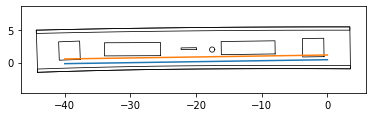

In [1]:
from ipynb.fs.full.whole_df import get_uppers, get_downers, get_whole_df, get_average_person_number,get_all_distances
import os
import numpy as np
import itertools
import pandas as pd
import statistics
import math

In [2]:
mean_distance = []
standard_deviation = []
for filename in os.listdir(r"C:\Users\robin\Documents\Bachelorarbeit\Wartetrauben Analyse und Auswertung\Whole Dfs"):
    if "geo" not in filename:
#         df = get_whole_df(filename, 5, 5)
        df = pd.read_csv("Whole Dfs/" + filename, index_col=0)
        borderDistance = get_all_distances(df)
        mean_distance.append(statistics.mean(borderDistance))
        standard_deviation.append(statistics.pstdev(borderDistance))

In [3]:
filenames = []
for filename in os.listdir(r"C:\Users\robin\Documents\Bachelorarbeit\Wartetrauben Analyse und Auswertung\Whole Dfs"):
    if "geo" not in filename:
        filenames.append(filename)
filenames = [str(i[7:9]) + "." + str(i[5:7]) + ".2020" for i in filenames]

In [4]:
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sb
plt.rcParams["font.family"] = "Microsoft Yi Baiti"
mlp.rc('font',family="Microsoft Yi Baiti")

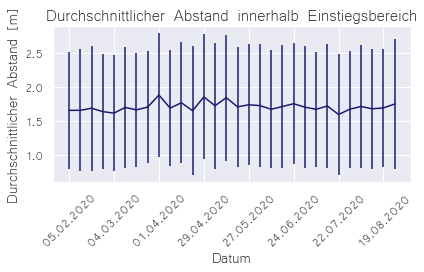

In [5]:
sb.set()
plt.errorbar(filenames, mean_distance, standard_deviation, color = "midnightblue")
plt.xticks(filenames, fontsize = 15, fontname = "Microsoft Yi Baiti", rotation = 45)
plt.xlabel("Datum", fontsize = 18, fontname = "Microsoft Yi Baiti")
plt.ylabel("Durchschnittlicher Abstand [m]", fontsize = 18, fontname = "Microsoft Yi Baiti")
plt.yticks(fontsize = 15, fontname = "Microsoft Yi Baiti")
plt.locator_params(axis="x", nbins=8)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.title("Durchschnittlicher Abstand innerhalb Einstiegsbereich", fontsize = 20,fontname="Microsoft Yi Baiti")
plt.savefig(r"Durchschnittlichen Abstände\Durchschnittabstand in Einstiegsbereich Standardabweichung", dpi = 200)

In [6]:
keep_distance_two_rolling = pd.Series(mean_distance).rolling(2).mean()
keep_distance_two_rolling

0          NaN
1     1.657381
2     1.672938
3     1.663335
4     1.627370
5     1.658185
6     1.682210
7     1.684727
8     1.793570
9     1.786172
10    1.729517
11    1.710235
12    1.753007
13    1.789594
14    1.784061
15    1.775689
16    1.723429
17    1.732711
18    1.699586
19    1.693148
20    1.734186
21    1.729206
22    1.688092
23    1.696742
24    1.658719
25    1.634940
26    1.693692
27    1.696906
28    1.686353
29    1.721391
dtype: float64

In [7]:
move = pd.DataFrame(index = filenames)
move["Durchschnittlicher Abstand"] = mean_distance
move["Gleitender Durchschnitt"] = list(keep_distance_two_rolling)

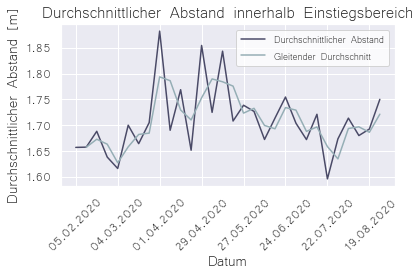

In [8]:
sb.lineplot(data = move, palette = "bone", sort = False, dashes = False, markers = False)
plt.xticks(filenames, fontsize = 15, fontname = "Microsoft Yi Baiti", rotation = 45)
plt.xlabel("Datum", fontsize = 18, fontname = "Microsoft Yi Baiti")
plt.ylabel("Durchschnittlicher Abstand [m]", fontsize = 18, fontname = "Microsoft Yi Baiti")
plt.yticks(fontsize = 15, fontname = "Microsoft Yi Baiti")
plt.locator_params(axis="x", nbins=8)
plt.legend(facecolor = "white", prop={'family':"Microsoft Yi Baiti", 'size':12})
plt.title("Durchschnittlicher Abstand innerhalb Einstiegsbereich", fontsize = 20,fontname="Microsoft Yi Baiti")
plt.tight_layout()
plt.savefig(r"Durchschnittlichen Abstände\Durchschnittabstand in Einstiegsbereich gleitender Durchschnitt", dpi = 200)

In [9]:
move["Gleitender Durchschnitt"] = list(pd.Series(mean_distance).expanding().mean())

In [10]:
move.columns = ['Durchschnittlicher Abstand', 'Kumulierter gleitender Durchschnitt']

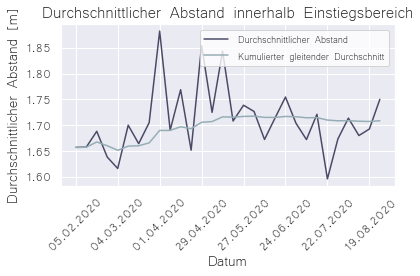

In [11]:
sb.lineplot(data = move, palette = "bone", sort = False, dashes = False, markers = False)
plt.xticks(filenames, fontsize = 15, fontname = "Microsoft Yi Baiti", rotation = 45)
plt.xlabel("Datum", fontsize = 18, fontname = "Microsoft Yi Baiti")
plt.ylabel("Durchschnittlicher Abstand [m]", fontsize = 18, fontname = "Microsoft Yi Baiti")
plt.yticks(fontsize = 15, fontname = "Microsoft Yi Baiti")
plt.locator_params(axis="x", nbins=8)
plt.legend(facecolor = "white", loc='upper right', prop={'family':"Microsoft Yi Baiti", 'size':12})
plt.title("Durchschnittlicher Abstand innerhalb Einstiegsbereich", fontsize = 20,fontname="Microsoft Yi Baiti")
plt.tight_layout()
plt.savefig(r"Durchschnittlichen Abstände\Durchschnittabstand in Einstiegsbereich kumulierter gleitender Durchschnitt", dpi = 200)